In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 8

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [13]:
!pip install keras==2.6.*

  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0


ERROR: tensorflow 2.8.0 has requirement keras<2.9,>=2.8.0rc0, but you'll have keras 2.6.0 which is incompatible.


In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [15]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 8)                 88        
                                                                 
Total params: 1,158
Trainable params: 1,158
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [17]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [18]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
4/4 [==============================] - 1s 55ms/step - loss: 2.2011 - accuracy: 0.1140 - val_loss: 2.0695 - val_accuracy: 0.1184

Epoch 00001: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 2/1000
4/4 [==============================] - 0s 9ms/step - loss: 2.1659 - accuracy: 0.1075 - val_loss: 2.0503 - val_accuracy: 0.1118

Epoch 00002: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 3/1000
4/4 [==============================] - 0s 9ms/step - loss: 2.1316 - accuracy: 0.1272 - val_loss: 2.0314 - val_accuracy: 0.1118

Epoch 00003: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 4/1000
4/4 [==============================] - 0s 9ms/step - loss: 2.0992 - accuracy: 0.1360 - val_loss: 2.0108 - val_accuracy: 0.2566

Epoch 00004: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 5/1000
4/4 [==============================] - 0s 11ms/step - loss: 2.0863 - accuracy: 0.1316 - val_loss: 1.99

4/4 [==============================] - 0s 11ms/step - loss: 1.5411 - accuracy: 0.4518 - val_loss: 1.3128 - val_accuracy: 0.6513

Epoch 00038: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 39/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.5690 - accuracy: 0.4167 - val_loss: 1.2858 - val_accuracy: 0.6513

Epoch 00039: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 40/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.5232 - accuracy: 0.4364 - val_loss: 1.2626 - val_accuracy: 0.6579

Epoch 00040: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 41/1000
4/4 [==============================] - 0s 12ms/step - loss: 1.5324 - accuracy: 0.4693 - val_loss: 1.2415 - val_accuracy: 0.6513

Epoch 00041: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 42/1000
4/4 [==============================] - 0s 8ms/step - loss: 1.4673 - accuracy: 0.4846 - val_loss: 1.2200 - val

4/4 [==============================] - 0s 10ms/step - loss: 1.0404 - accuracy: 0.6228 - val_loss: 0.7585 - val_accuracy: 0.7829

Epoch 00075: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 76/1000
4/4 [==============================] - 0s 11ms/step - loss: 1.0543 - accuracy: 0.6250 - val_loss: 0.7473 - val_accuracy: 0.7829

Epoch 00076: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 77/1000
4/4 [==============================] - 0s 11ms/step - loss: 1.0325 - accuracy: 0.6404 - val_loss: 0.7363 - val_accuracy: 0.7829

Epoch 00077: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 78/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0503 - accuracy: 0.6294 - val_loss: 0.7239 - val_accuracy: 0.7829

Epoch 00078: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 79/1000
4/4 [==============================] - 0s 12ms/step - loss: 1.0470 - accuracy: 0.6382 - val_loss: 0.7143 - va

4/4 [==============================] - 0s 11ms/step - loss: 0.8406 - accuracy: 0.7083 - val_loss: 0.5097 - val_accuracy: 0.7895

Epoch 00112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 113/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.8318 - accuracy: 0.7105 - val_loss: 0.5034 - val_accuracy: 0.7895

Epoch 00113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 114/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.8532 - accuracy: 0.6776 - val_loss: 0.4969 - val_accuracy: 0.7895

Epoch 00114: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 115/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.8307 - accuracy: 0.6974 - val_loss: 0.4906 - val_accuracy: 0.7961

Epoch 00115: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 116/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.8192 - accuracy: 0.7061 - val_loss: 0.4859 

Epoch 149/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.7144 - accuracy: 0.7500 - val_loss: 0.3979 - val_accuracy: 0.8421

Epoch 00149: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 150/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.7298 - accuracy: 0.7281 - val_loss: 0.3943 - val_accuracy: 0.8421

Epoch 00150: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 151/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.7997 - accuracy: 0.7259 - val_loss: 0.3928 - val_accuracy: 0.8026

Epoch 00151: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 152/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.7061 - accuracy: 0.7149 - val_loss: 0.3896 - val_accuracy: 0.7961

Epoch 00152: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 153/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.7444 - accuracy: 0.7522 - val_l

4/4 [==============================] - 0s 10ms/step - loss: 0.6573 - accuracy: 0.7654 - val_loss: 0.3247 - val_accuracy: 0.8816

Epoch 00186: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 187/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.6771 - accuracy: 0.7522 - val_loss: 0.3232 - val_accuracy: 0.8816

Epoch 00187: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 188/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.6576 - accuracy: 0.7522 - val_loss: 0.3207 - val_accuracy: 0.8750

Epoch 00188: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 189/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.7154 - accuracy: 0.7412 - val_loss: 0.3174 - val_accuracy: 0.8750

Epoch 00189: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 190/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.6617 - accuracy: 0.7610 - val_loss: 0.3141 

Epoch 223/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.6146 - accuracy: 0.7697 - val_loss: 0.2763 - val_accuracy: 0.8882

Epoch 00223: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 224/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.6266 - accuracy: 0.7697 - val_loss: 0.2766 - val_accuracy: 0.8882

Epoch 00224: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 225/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.6320 - accuracy: 0.7719 - val_loss: 0.2765 - val_accuracy: 0.8882

Epoch 00225: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 226/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.6023 - accuracy: 0.7763 - val_loss: 0.2748 - val_accuracy: 0.8882

Epoch 00226: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 227/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.6824 - accuracy: 0.7390 - v

Epoch 260/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.5856 - accuracy: 0.7763 - val_loss: 0.2358 - val_accuracy: 0.8947

Epoch 00260: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 261/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.5759 - accuracy: 0.8070 - val_loss: 0.2344 - val_accuracy: 0.8882

Epoch 00261: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 262/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.5812 - accuracy: 0.7829 - val_loss: 0.2332 - val_accuracy: 0.8882

Epoch 00262: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 263/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.5616 - accuracy: 0.7982 - val_loss: 0.2330 - val_accuracy: 0.8882

Epoch 00263: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 264/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.5696 - accuracy: 0.7741 - val_l

4/4 [==============================] - 0s 8ms/step - loss: 0.5750 - accuracy: 0.7741 - val_loss: 0.2116 - val_accuracy: 0.9079

Epoch 00297: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 298/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.5022 - accuracy: 0.8158 - val_loss: 0.2092 - val_accuracy: 0.9079

Epoch 00298: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 299/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.5233 - accuracy: 0.8026 - val_loss: 0.2054 - val_accuracy: 0.9079

Epoch 00299: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 300/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.5618 - accuracy: 0.7982 - val_loss: 0.2024 - val_accuracy: 0.9079

Epoch 00300: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 301/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.5603 - accuracy: 0.7939 - val_loss: 0.2000 - va

4/4 [==============================] - 0s 8ms/step - loss: 0.4959 - accuracy: 0.8202 - val_loss: 0.1754 - val_accuracy: 0.9079

Epoch 00334: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 335/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.5150 - accuracy: 0.8158 - val_loss: 0.1754 - val_accuracy: 0.9079

Epoch 00335: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 336/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.5322 - accuracy: 0.8026 - val_loss: 0.1771 - val_accuracy: 0.9079

Epoch 00336: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 337/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.5398 - accuracy: 0.8202 - val_loss: 0.1787 - val_accuracy: 0.9079

Epoch 00337: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 338/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.5036 - accuracy: 0.8202 - val_loss: 0.1786 - va

4/4 [==============================] - 0s 8ms/step - loss: 0.5239 - accuracy: 0.7917 - val_loss: 0.1553 - val_accuracy: 0.9539

Epoch 00371: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 372/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.4827 - accuracy: 0.8289 - val_loss: 0.1570 - val_accuracy: 0.9342

Epoch 00372: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 373/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.5016 - accuracy: 0.8268 - val_loss: 0.1572 - val_accuracy: 0.9211

Epoch 00373: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 374/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.5397 - accuracy: 0.8224 - val_loss: 0.1584 - val_accuracy: 0.9145

Epoch 00374: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 375/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.4506 - accuracy: 0.8224 - val_loss: 0.1589 - va

4/4 [==============================] - 0s 10ms/step - loss: 0.4717 - accuracy: 0.8333 - val_loss: 0.1370 - val_accuracy: 0.9868

Epoch 00408: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 409/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.4843 - accuracy: 0.8224 - val_loss: 0.1370 - val_accuracy: 0.9868

Epoch 00409: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 410/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.4423 - accuracy: 0.8377 - val_loss: 0.1375 - val_accuracy: 0.9868

Epoch 00410: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 411/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.4929 - accuracy: 0.8180 - val_loss: 0.1389 - val_accuracy: 0.9868

Epoch 00411: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 412/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.5040 - accuracy: 0.8048 - val_loss: 0.1402 - 

Epoch 445/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.4360 - accuracy: 0.8311 - val_loss: 0.1238 - val_accuracy: 0.9934

Epoch 00445: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 446/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.4273 - accuracy: 0.8443 - val_loss: 0.1241 - val_accuracy: 0.9934

Epoch 00446: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 447/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.4928 - accuracy: 0.8136 - val_loss: 0.1262 - val_accuracy: 0.9934

Epoch 00447: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 448/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.4100 - accuracy: 0.8443 - val_loss: 0.1271 - val_accuracy: 0.9934

Epoch 00448: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 449/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.4265 - accuracy: 0.8421 - val_lo


Epoch 00481: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 482/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.4759 - accuracy: 0.8268 - val_loss: 0.1151 - val_accuracy: 0.9868

Epoch 00482: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 483/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.4381 - accuracy: 0.8377 - val_loss: 0.1148 - val_accuracy: 0.9868

Epoch 00483: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 484/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.4460 - accuracy: 0.8487 - val_loss: 0.1136 - val_accuracy: 0.9868

Epoch 00484: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 485/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.3981 - accuracy: 0.8706 - val_loss: 0.1129 - val_accuracy: 0.9868

Epoch 00485: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 486/1000
4/4 [===

4/4 [==============================] - 0s 16ms/step - loss: 0.4231 - accuracy: 0.8662 - val_loss: 0.1132 - val_accuracy: 0.9934

Epoch 00518: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 519/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.4479 - accuracy: 0.8311 - val_loss: 0.1113 - val_accuracy: 0.9934

Epoch 00519: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 520/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.4784 - accuracy: 0.8355 - val_loss: 0.1106 - val_accuracy: 0.9934

Epoch 00520: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 521/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.4254 - accuracy: 0.8377 - val_loss: 0.1097 - val_accuracy: 0.9934

Epoch 00521: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 522/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.4264 - accuracy: 0.8487 - val_loss: 0.1094 

4/4 [==============================] - 0s 9ms/step - loss: 0.4479 - accuracy: 0.8289 - val_loss: 0.0973 - val_accuracy: 0.9868

Epoch 00555: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 556/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.4505 - accuracy: 0.8377 - val_loss: 0.0972 - val_accuracy: 0.9868

Epoch 00556: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 557/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.4315 - accuracy: 0.8531 - val_loss: 0.0975 - val_accuracy: 0.9934

Epoch 00557: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 558/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.3782 - accuracy: 0.8684 - val_loss: 0.0970 - val_accuracy: 0.9934

Epoch 00558: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 559/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.4573 - accuracy: 0.8575 - val_loss: 0.0968 

4/4 [==============================] - 0s 10ms/step - loss: 0.3787 - accuracy: 0.8662 - val_loss: 0.0887 - val_accuracy: 1.0000

Epoch 00592: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 593/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.4299 - accuracy: 0.8311 - val_loss: 0.0891 - val_accuracy: 1.0000

Epoch 00593: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 594/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.3790 - accuracy: 0.8662 - val_loss: 0.0900 - val_accuracy: 1.0000

Epoch 00594: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 595/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.4097 - accuracy: 0.8289 - val_loss: 0.0918 - val_accuracy: 1.0000

Epoch 00595: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 596/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.4451 - accuracy: 0.8224 - val_loss: 0.0931 

Epoch 629/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.3255 - accuracy: 0.8772 - val_loss: 0.0831 - val_accuracy: 0.9934

Epoch 00629: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 630/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.4201 - accuracy: 0.8268 - val_loss: 0.0823 - val_accuracy: 1.0000

Epoch 00630: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 631/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.4201 - accuracy: 0.8443 - val_loss: 0.0823 - val_accuracy: 0.9934

Epoch 00631: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 632/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.3994 - accuracy: 0.8509 - val_loss: 0.0835 - val_accuracy: 0.9934

Epoch 00632: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 633/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.4486 - accuracy: 0.8333 - val


Epoch 00665: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 666/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.3584 - accuracy: 0.8794 - val_loss: 0.0796 - val_accuracy: 0.9868

Epoch 00666: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 667/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.3957 - accuracy: 0.8333 - val_loss: 0.0792 - val_accuracy: 0.9868

Epoch 00667: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 668/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2967 - accuracy: 0.8969 - val_loss: 0.0787 - val_accuracy: 0.9868

Epoch 00668: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 669/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.3647 - accuracy: 0.8596 - val_loss: 0.0776 - val_accuracy: 0.9934

Epoch 00669: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 670/1000
4/4 [====

4/4 [==============================] - 0s 9ms/step - loss: 0.3758 - accuracy: 0.8772 - val_loss: 0.0693 - val_accuracy: 0.9868

Epoch 00702: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 703/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.4145 - accuracy: 0.8531 - val_loss: 0.0700 - val_accuracy: 0.9868

Epoch 00703: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 704/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.3772 - accuracy: 0.8684 - val_loss: 0.0712 - val_accuracy: 0.9868

Epoch 00704: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 705/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.4476 - accuracy: 0.8553 - val_loss: 0.0719 - val_accuracy: 0.9868

Epoch 00705: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 706/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.3498 - accuracy: 0.8531 - val_loss: 0.0724 - 

In [19]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

2/2 [==============================] - 0s 3ms/step - loss: 0.0695 - accuracy: 0.9934


In [21]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [24]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[2.6345907e-02 2.7761245e-03 9.5209533e-01 2.2999400e-04 2.4183993e-05
 1.5361196e-02 2.0404039e-03 1.1269632e-03]
2


# Confusion matrix

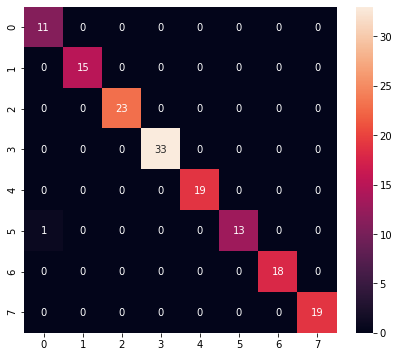

Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        33
           4       1.00      1.00      1.00        19
           5       1.00      0.93      0.96        14
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        19

    accuracy                           0.99       152
   macro avg       0.99      0.99      0.99       152
weighted avg       0.99      0.99      0.99       152



In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [25]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [26]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\ainap\AppData\Local\Temp\tmpxxsu5oce\assets


6592

# Inference test

In [27]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [28]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [29]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [30]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [31]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.6345892e-02 2.7761220e-03 9.5209533e-01 2.2999400e-04 2.4183966e-05
 1.5361196e-02 2.0404027e-03 1.1269620e-03]
2
